In [2]:
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv("/content/top_10000_1960-now.csv")

# Display the first few rows and select specific columns
spotify_data.head()



,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [3]:
# Check for missing values
missing_values = spotify_data.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)

# Display summary statistics
summary_statistics = spotify_data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Missing Values:
 Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         2
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                     

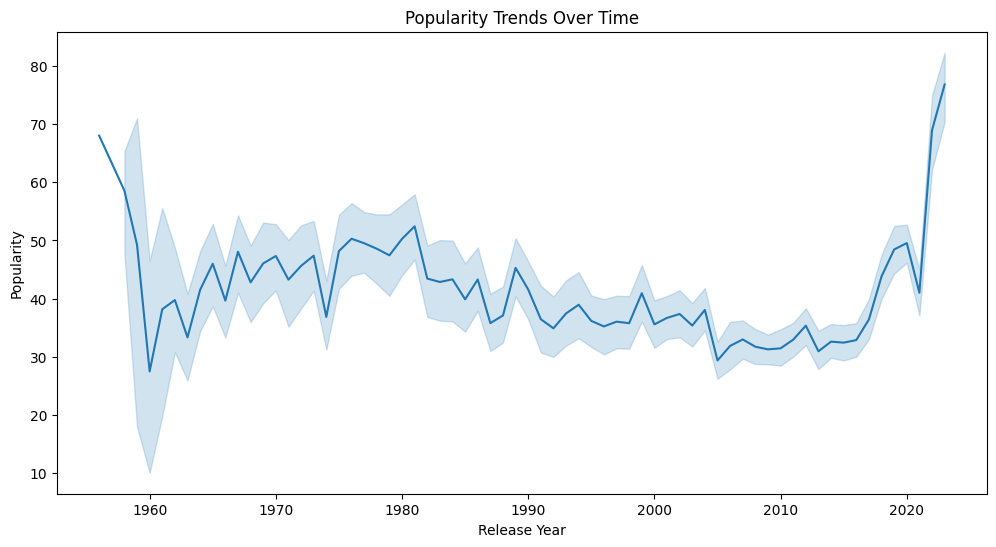

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Album Release Date' to datetime
spotify_data['Album Release Date'] = pd.to_datetime(spotify_data['Album Release Date'], errors='coerce')

# Extract year from 'Album Release Date'
spotify_data['Release Year'] = spotify_data['Album Release Date'].dt.year

# Plotting Popularity trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='Popularity', data=spotify_data)
plt.title('Popularity Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()


# Filter out NaN values and select relevant columns for ANOVA
filtered_data_anova = spotify_data[['Popularity', 'Artist Genres']].dropna(subset=['Popularity', 'Artist Genres'])

# Create a new column for the primary genre
filtered_data_anova['Primary Genre'] = filtered_data_anova['Artist Genres'].str.split(',').str[0].str.strip()

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*[filtered_data_anova[filtered_data_anova['Primary Genre'] == genre]['Popularity'] for genre in unique_genres])

print("ANOVA Test Result:")
print(f" F-statistic: {f_statistic}")
print(f" P-value: {p_value}")


In [ ]:
# Display unique genres and their counts
genre_counts = filtered_data_anova['Primary Genre'].value_counts()
print("Unique Genres and Counts:\n", genre_counts)


Unique Genres and Counts:
 dance pop            972
album rock           605
pop                  530
australian rock      377
adult standards      339
                    ... 
trance                 1
post-disco             1
german show tunes      1
nyc pop                1
tropical house         1
Name: Primary Genre, Length: 502, dtype: int64


In [ ]:
# Choose the top N genres
top_genres = genre_counts.head(10).index

# Perform ANOVA for the top genres
f_statistic, p_value = stats.f_oneway(*[filtered_data_anova[filtered_data_anova['Primary Genre'] == genre]['Popularity'] for genre in top_genres])

print("ANOVA Test Result (Top Genres):")
print(f" F-statistic: {f_statistic}")
print(f" P-value: {p_value}")


ANOVA Test Result (Top Genres):
 F-statistic: 29.993221361889077
 P-value: 4.0309357939334904e-51


In [ ]:
# Display columns in the filtered dataset
print(filtered_data_anova.columns)
# Display columns in the original dataset
print(spotify_data.columns)



Index(['Popularity', 'Artist Genres', 'Primary Genre'], dtype='object')
Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')


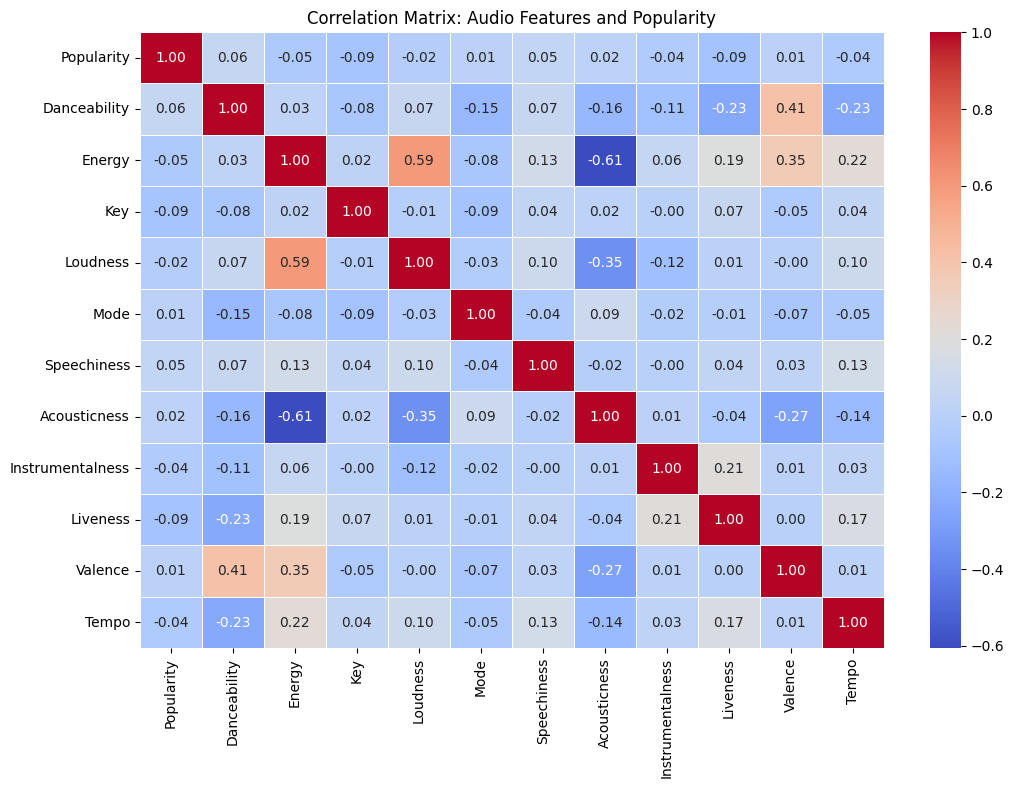

In [ ]:
# Select audio features and popularity for the top genres from the original dataset
audio_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
selected_data = spotify_data[spotify_data['Artist Genres'].isin(top_genres)][['Popularity'] + audio_features]

# Correlation matrix
correlation_matrix = selected_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Audio Features and Popularity')
plt.show()


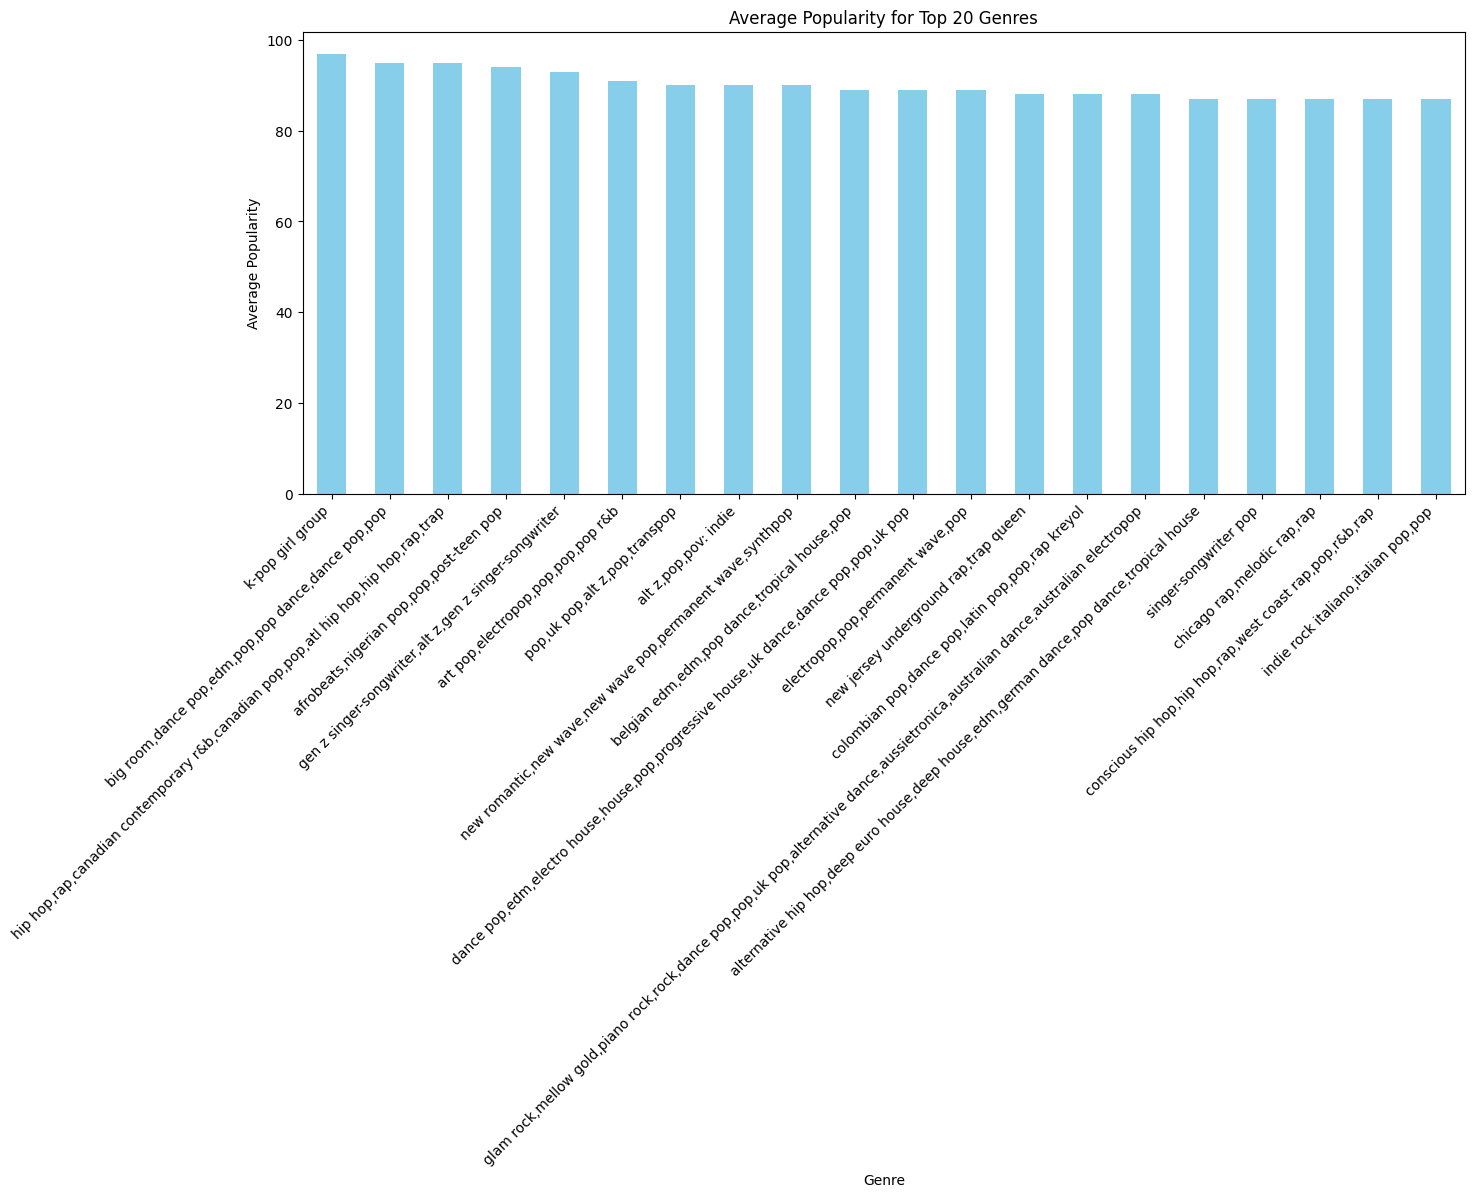

In [ ]:
# Average popularity for different genres
genre_popularity = spotify_data.groupby('Artist Genres')['Popularity'].mean().sort_values(ascending=False)

# Plotting bar chart
plt.figure(figsize=(15, 6))
genre_popularity[:20].plot(kind='bar', color='skyblue')
plt.title('Average Popularity for Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()


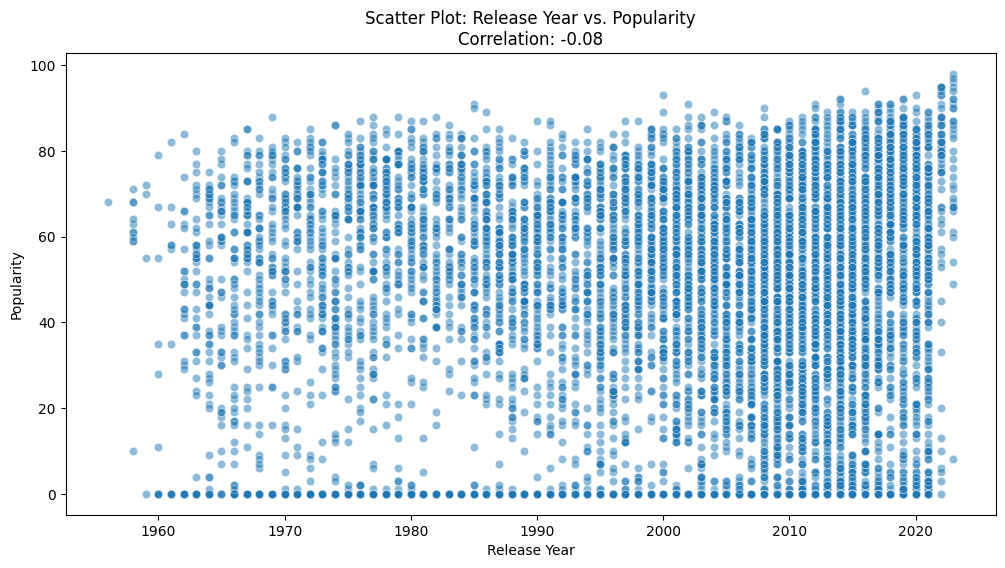

In [ ]:
# Convert 'Album Release Date' to datetime, handle errors, and extract the year
spotify_data['Release Year'] = pd.to_datetime(spotify_data['Album Release Date'], errors='coerce').dt.year

# Drop rows with missing release year
spotify_data.dropna(subset=['Release Year'], inplace=True)

# Correlation between release year and popularity
correlation_year_popularity = spotify_data[['Release Year', 'Popularity']].corr().iloc[0, 1]

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Release Year', y='Popularity', data=spotify_data, alpha=0.5)
plt.title(f'Scatter Plot: Release Year vs. Popularity\nCorrelation: {correlation_year_popularity:.2f}')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()


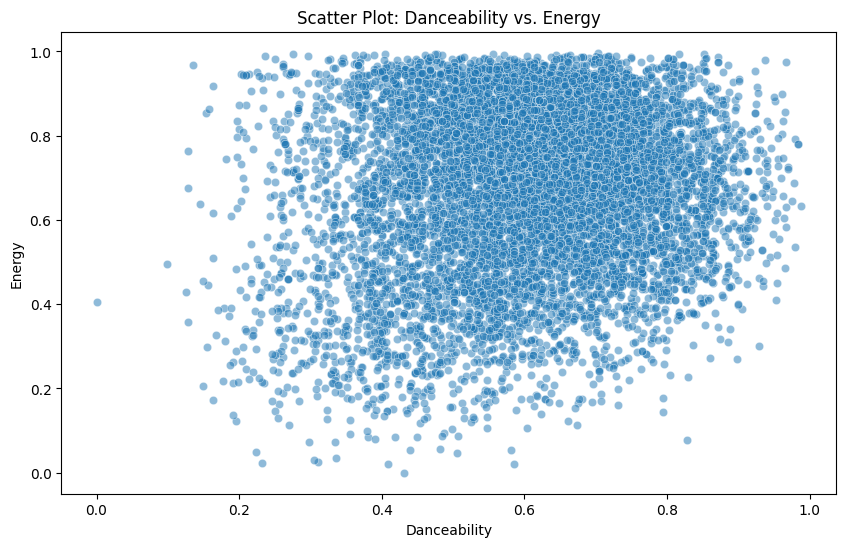

Correlation between Danceability and Energy: 0.13


In [ ]:
# Scatter plot of Danceability vs. Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Danceability', y='Energy', data=spotify_data, alpha=0.5)
plt.title('Scatter Plot: Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Correlation between Danceability and Energy
correlation_danceability_energy = spotify_data[['Danceability', 'Energy']].corr().iloc[0, 1]
print(f'Correlation between Danceability and Energy: {correlation_danceability_energy:.2f}')


Correlation between Valence and Danceability: 0.445884628285677
Popularity by Mode:
Mode
0.0    38.193698
1.0    37.389716
Name: Popularity, dtype: float64


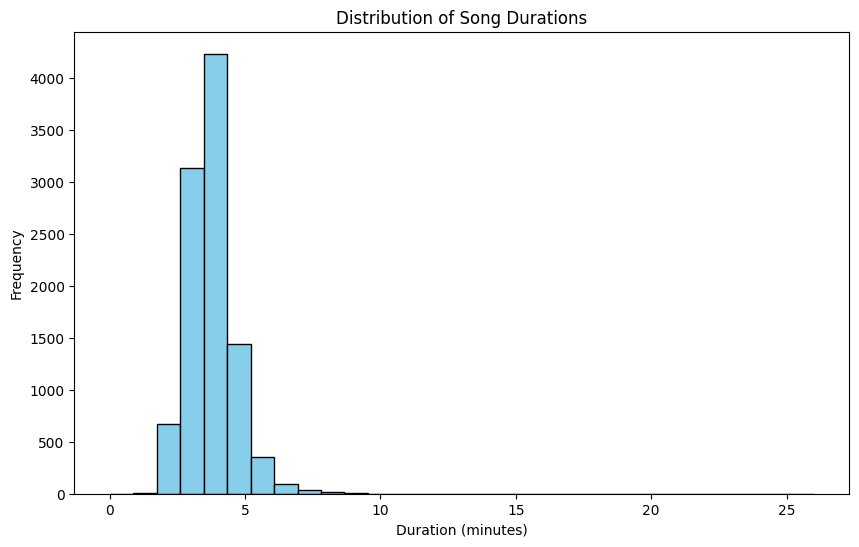

ANOVA Test Result (Song Duration by Genre):
 F-statistic: 21.48811149687013
 P-value: 2.167000312690333e-16


In [7]:
# Define the top genres
top_genres = ['dance pop', 'album rock', 'pop', 'australian rock', 'adult standards']

# Correlation between Valence and Danceability
correlation_valence_danceability = spotify_data[['Valence', 'Danceability']].corr().iloc[0, 1]
print(f'Correlation between Valence and Danceability: {correlation_valence_danceability}')

# Popularity by Mode (Major/Minor)
mode_popularity = spotify_data.groupby('Mode')['Popularity'].mean()
print(f'Popularity by Mode:\n{mode_popularity}')

# Distribution of Song Durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(spotify_data['Track Duration (ms)'] / 60000, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# ANOVA Test on Song Duration by Genre
from scipy.stats import f_oneway

# Selecting relevant data
duration_data_anova = spotify_data[['Track Duration (ms)', 'Artist Genres']].dropna()

# Fitting the ANOVA model
f_statistic, p_value = f_oneway(*[duration_data_anova[duration_data_anova['Artist Genres'] == genre]['Track Duration (ms)'] for genre in top_genres])
print(f'ANOVA Test Result (Song Duration by Genre):\n F-statistic: {f_statistic}\n P-value: {p_value}')


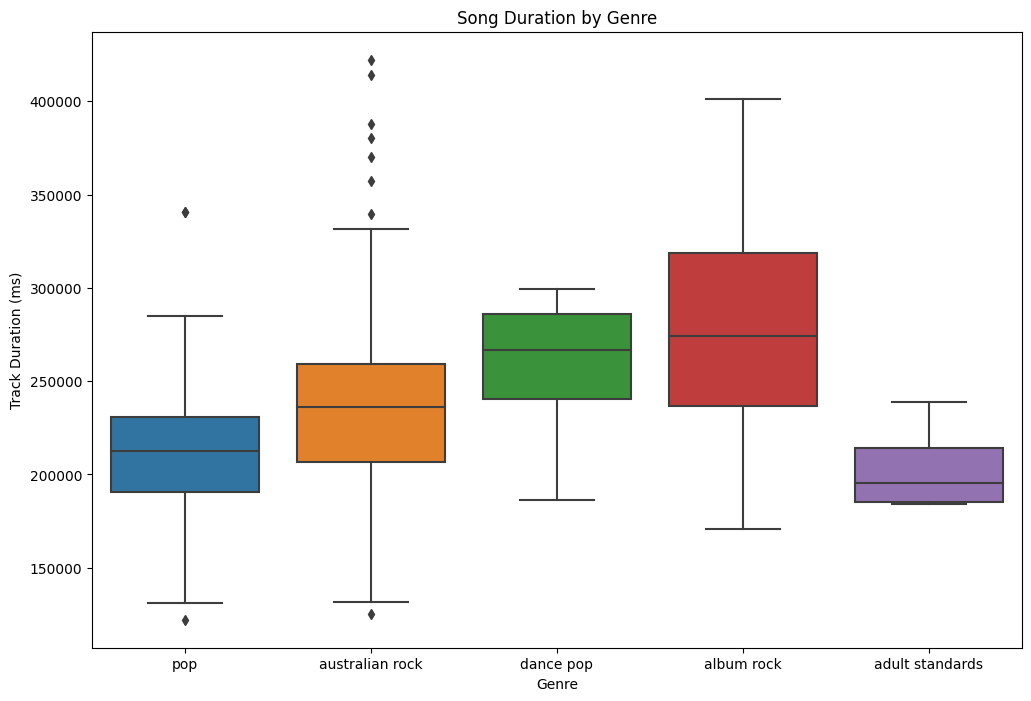

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Song Duration by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist Genres', y='Track Duration (ms)', data=duration_data_anova[duration_data_anova['Artist Genres'].isin(top_genres)])
plt.title('Song Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Track Duration (ms)')
plt.show()


In [9]:
from scipy.stats import ttest_ind

# Separate data into two groups: explicit and non-explicit songs
explicit_popularity = spotify_data[spotify_data['Explicit'] == 1]['Popularity']
non_explicit_popularity = spotify_data[spotify_data['Explicit'] == 0]['Popularity']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(explicit_popularity, non_explicit_popularity, equal_var=False)
print(f'Independent Samples t-test (Popularity of Explicit vs. Non-explicit Songs):\n t-statistic: {t_statistic}\n P-value: {p_value}')


Independent Samples t-test (Popularity of Explicit vs. Non-explicit Songs):
 t-statistic: 4.721285231777506
 P-value: 2.9797058120439974e-06
